Importing necessary libraries

In [4]:
import numpy as np

In [5]:
import tensorflow as tf

In [114]:
import matplotlib.pyplot as plt

Data Generation

In [99]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('T_intro', inputs=generated_inputs, targets=generated_targets)

Creating a Model

loading the data file

In [100]:
tdata=np.load('T_intro.npz')

In [101]:
input_size=2

In [102]:
output_size=1

creating a model 
mentioning the number of layers i.e neuron at the output to be one(same size as output variable)

In [108]:
nnmodel=tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

Selecting optimizer and loss function ,
sgd-Stochastic gradient descent [Optimization function],
loss function=Mean square error.

In [109]:
nnmodel.compile(optimizer='sgd',loss='mean_squared_error')

In [110]:
nnmodel.fit(tdata['inputs'],tdata['targets'],epochs=150,verbose=1)

Train on 1000 samples
Epoch 1/150
1000/1000 [==============================] - 0s 232us/sample - loss: 30.9710
Epoch 2/150
1000/1000 [==============================] - 0s 25us/sample - loss: 4.4301
Epoch 3/150
1000/1000 [==============================] - 0s 26us/sample - loss: 1.4710
Epoch 4/150
1000/1000 [==============================] - 0s 27us/sample - loss: 0.6655
Epoch 5/150
1000/1000 [==============================] - 0s 25us/sample - loss: 0.4285
Epoch 6/150
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3688
Epoch 7/150
1000/1000 [==============================] - 0s 24us/sample - loss: 0.3496
Epoch 8/150
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3467
Epoch 9/150
1000/1000 [==============================] - 0s 27us/sample - loss: 0.3440
Epoch 10/150
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3379
Epoch 11/150
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3384
Epoch 12/150
1000

In [112]:
nnmodel.layers[0].get_weights()

[array([[ 1.9741173],
        [-3.0048504]], dtype=float32),
 array([4.99937], dtype=float32)]

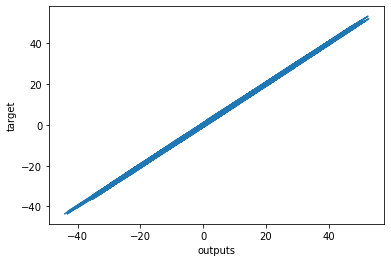

In [117]:
plt.plot(np.squeeze(nnmodel.predict_on_batch(tdata['inputs'])),np.squeeze(tdata['targets']))
plt.xlabel('outputs')
plt.ylabel('target')
plt.show()